In [1]:
#Romberg
#Euler scheme

import numpy as np
import matplotlib.pyplot as plt

mc=100000
Dt=[2**(-10),2**(-9),2**(-8),2**(-7),2**(-6)]


dW=np.zeros((mc,2**(11)))
for i in range (mc):
    np.random.seed(i)
    dW[i,:]=np.sqrt(2**(-11))*np.random.randn(2**(11))

W=np.zeros((mc,2**(11)))

for i in range(mc):
        W[i,:]=np.cumsum(dW[i,:])

b=2;sigma=0.2;T=1
X_zero=np.ones(mc)

X_true= np.zeros(mc)

X_true= np.exp((b-0.5*sigma**2)*(T)*np.ones(mc)+ sigma*W[:,-1])

k1=2**(-11)
X_Euler1= np.ones(mc)
for a in range(2**(11)):
    X_Euler1+= b*X_Euler1*(k1)+ sigma*X_Euler1*dW[:,a]

k2=2**(-10)
X_Euler2= np.ones(mc)
Winc2=np.zeros((mc,2**10))
for c in range(2**10):
    for j in range(mc):
        Winc2[j,c]=np.sum(dW[j,:][range(2*c,2*(c+1))])
    X_Euler2+= b*X_Euler2*(k2)+ sigma*X_Euler2*Winc2[:,c]

k3=2**(-9)
X_Euler3= np.ones(mc)
Winc3= np.zeros((mc,2**(9)))
for d in range(2**(9)):
    for j in range(mc):
        Winc3[j,d]=np.sum(dW[j,:][range(4*d,4*(d+1))])
    X_Euler3+= b*X_Euler3*(k3)+ sigma*X_Euler3*Winc3[:,d]

k4=2**(-8)
X_Euler4= np.ones(mc)
Winc4= np.zeros((mc,2**(8)))
for e in range(2**(8)):
    for j in range(mc):
        Winc4[j,e]= np.sum(dW[j,:][range(8*e,8*(e+1))])
    X_Euler4+= b*X_Euler4*(k4)+ sigma*X_Euler4*Winc4[:,e]
    
k5=2**(-7)
X_Euler5=np.ones(mc)
Winc5=np.zeros((mc,2**(7)))
for f in range (2**(7)):
    for j in range(mc):
        Winc5[j,f]= np.sum(dW[j,:][range(16*f,16*(f+1))])
    X_Euler5+= b*X_Euler5*(k5)+ sigma*X_Euler5*Winc5[:,f]

k6=2**(-6)
X_Euler6=np.ones(mc)
Winc6=np.zeros((mc,2**(6)))
for g in range (2**(6)):
    for j in range(mc):
        Winc6[j,g]= np.sum(dW[j,:][range(32*g,32*(g+1))])
    X_Euler6+= b*X_Euler6*(k6)+ sigma*X_Euler6*Winc6[:,g]


A=np.mean(X_Euler1,0) 
B=np.mean(X_Euler2,0)
C=np.mean(X_Euler3,0)
D=np.mean(X_Euler4,0) 
E=np.mean(X_Euler5,0)
F=np.mean(X_Euler6,0)
G=np.mean(X_true,0)

# 2 g(X"}h2 - g(X)h)
Romberg1= abs(G-(2*A-B))
Romberg2= abs(G-(2*B-C))
Romberg3= abs(G-(2*C-D))
Romberg4= abs(G-(2*D-E))
Romberg5= abs(G-(2*E-F))
Romberg_err=[Romberg1,Romberg2,Romberg3,Romberg4,Romberg5]


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [7]:
h = np.array(Dt).reshape(-1,1)
reg1 = LinearRegression().fit(np.log(h), np.log(Romberg_err))

array([1.93409904])

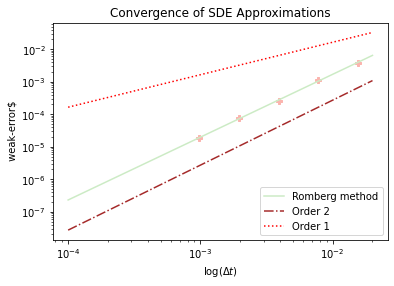

In [11]:
pal = ["#FBB4AE","#B3CDE3", "#CCEBC5","#CFCCC4"]
plt.loglog(Dt,Romberg_err,'P',color=pal[0])

x=np.linspace(0.0001,0.02)
#y=(reg1.coef_[0])*x + reg1.intercept_
y = np.exp(reg1.intercept_) * x**reg1.coef_
s = np.exp(1) * x**(2)
r = np.exp(0.5) * x**(1)
plt.loglog(x, y, color=pal[2], label='Romberg method')
plt.loglog(x, s, 'g-.' , color='brown', label='Order 2')
plt.loglog(x, r, ':' , color='red', label= 'Order 1')

plt.title('Convergence of SDE Approximations')
plt.xlabel('$\log(\Delta t)$'); plt.ylabel(' weak-error');plt.legend(loc=4)

plt.show()    